In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info

<bound method DataFrame.info of         HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare 

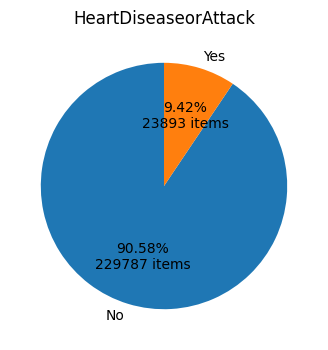

In [ ]:
# Defining a function to plot a simple pie chart
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()

plotPie(df["HeartDiseaseorAttack"], "HeartDiseaseorAttack", ["No", "Yes"])

In [ ]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## Print the data types

In [ ]:
df.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
df.shape

(253680, 22)

# Applied Data Preprocessing Techniques:
- Handling Missing Values
- Label Encoding
- Scaling Transformation

## Handling Missing Values

In [ ]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No Missing Values


## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
42230,0,1,0,1,27,1,0,2,1,1,...,1,0,3,15,0,1,1,11,3,5
114054,0,0,0,1,17,1,0,0,1,1,...,1,0,0,4,4,0,1,7,4,6
212716,0,0,1,1,16,1,0,0,1,0,...,1,0,1,0,0,0,1,6,5,6
215785,0,0,0,1,15,0,0,0,1,0,...,1,0,1,0,0,0,1,7,3,4
177572,0,0,1,1,16,0,0,0,1,1,...,1,0,1,0,0,0,0,5,5,7


# Scaling Transformation

In [ ]:
#scaler = MinMaxScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#df.sample(10)

In [ ]:
np.abs(df.iloc[:,:-1].corrwith(df['HeartDiseaseorAttack'])).sort_values(ascending = False)

HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Education               0.099600
PhysActivity            0.087299
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052912
CholCheck               0.044206
Veggies                 0.039167
NoDocbcCost             0.031000
HvyAlcoholConsump       0.028991
Fruits                  0.019790
AnyHealthcare           0.018734
dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix

## Test Train Split 20:80

In [ ]:
predictors = df.drop(['HeartDiseaseorAttack'], axis= 1)
target = df['HeartDiseaseorAttack']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0, stratify=target)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(202944, 21) (202944,)
(50736, 21) (50736,)


In [ ]:
y_train.value_counts()

0    183830
1     19114
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
classifiers_description = {"model":[],"precision":[], "recall":[],"f1-score":[], "accuracy":[], "standard_deviation" :[]}

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Helper Function

In [ ]:
def model_accuracy(classifier = None, predictors=None, target= None, n_splits = 20):
    start_time = datetime.now()
    global classifiers_description
    # helper function for Model Evaluation

    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    y_pred = cross_val_predict(classifier, predictors, target, cv=kf)
    scores = cross_val_score(classifier, predictors, target, cv=kf)

    #confusion matrix

    cf_matrix = confusion_matrix(target, y_pred)
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    sns.heatmap(cf_matrix,annot=True, ax=ax, fmt='g', cmap='Blues')

    #classifier description report
    report = classification_report(target, y_pred, output_dict=True)
    classifier_name = type(classifier).__name__
    if classifier_name not in classifiers_description["model"]:
        classifiers_description["model"].append(classifier_name)
        classifiers_description["precision"].append(report['weighted avg']["precision"])
        classifiers_description["recall"].append(report['weighted avg']["recall"])
        classifiers_description["f1-score"].append(report['weighted avg']["f1-score"])
        classifiers_description["accuracy"].append(scores.mean())
        classifiers_description["standard_deviation"].append(scores.std())


    print(classification_report(target, y_pred))
    # Plot the ROC-AUC Curve for model-1 :
    fpr, tpr, thresholds = roc_curve(target, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

    TP = cf_matrix[0][0]
    TN = cf_matrix[1][1]
    FP = cf_matrix[0][1]
    FN = cf_matrix[1][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)

    print("Performance: \n")
    print("TPR=   ",mean(TPR)*100)
    print("TNR=   ",mean(TNR)*100)
    print("Pre=   ",mean(PPV)*100)
    print("FPR=   ",mean(FPR)*100)
    print("FNR=   ",mean(FNR)*100)
    print("\n")

    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))

    return (scores.mean(), scores.std())

# Adaboosting

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    183830
           1       0.53      0.15      0.23     19114

    accuracy                           0.91    202944
   macro avg       0.72      0.57      0.59    202944
weighted avg       0.88      0.91      0.88    202944



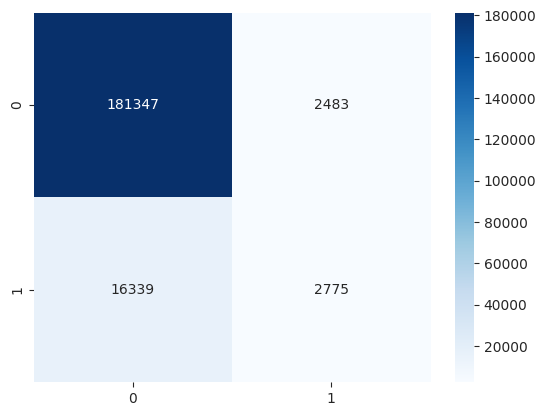

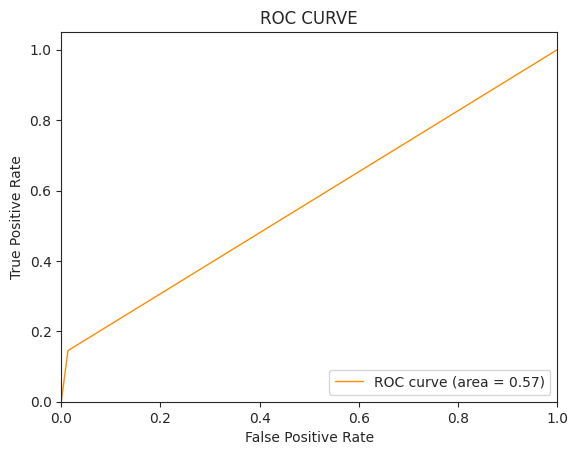

Performance: 

TPR=    91.73487247453032
TNR=    52.776721186763034
Pre=    98.64929554479683
FPR=    47.22327881323697
FNR=    8.265127525469683


Duration: 0:02:24.938521


(0.9072551934457049, 0.0015295309318384609)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier()
model_accuracy(classifier=AdaBoostClassifier(), predictors=x_train, target=y_train)

# Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.95      0.85      0.89    183830
           1       0.27      0.55      0.36     19114

    accuracy                           0.82    202944
   macro avg       0.61      0.70      0.63    202944
weighted avg       0.88      0.82      0.84    202944



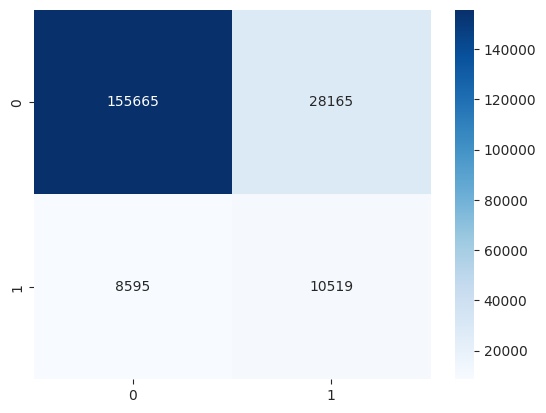

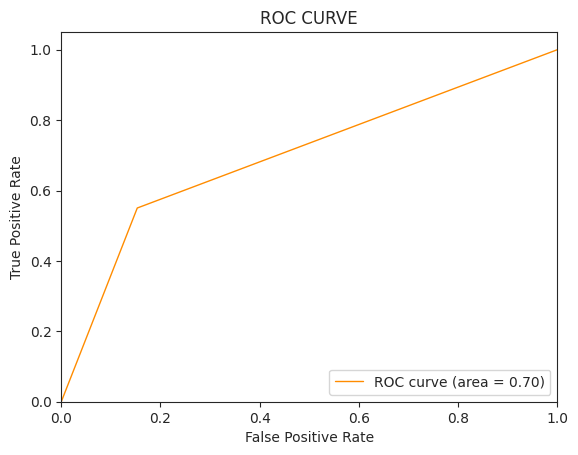

Performance: 

TPR=    94.76744186046511
TNR=    27.192120773446387
Pre=    84.6787793069684
FPR=    72.80787922655362
FNR=    5.232558139534884


Duration: 0:00:03.732099


(0.8188662810904879, 0.0012444792474940874)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB()
model_accuracy(classifier=clf_GNB, predictors=x_train, target=y_train)

# RandomForestClassifier

              precision    recall  f1-score   support

           0       0.91      0.99      0.95    183830
           1       0.44      0.11      0.18     19114

    accuracy                           0.90    202944
   macro avg       0.68      0.55      0.56    202944
weighted avg       0.87      0.90      0.88    202944



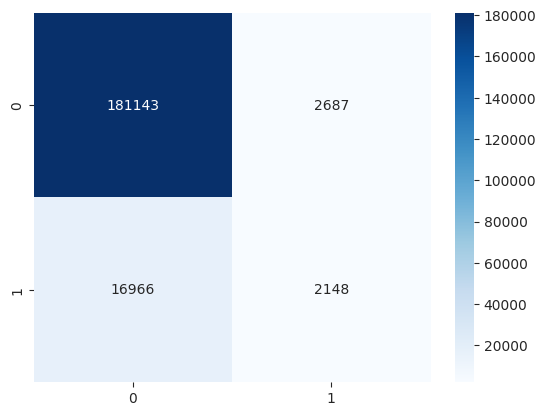

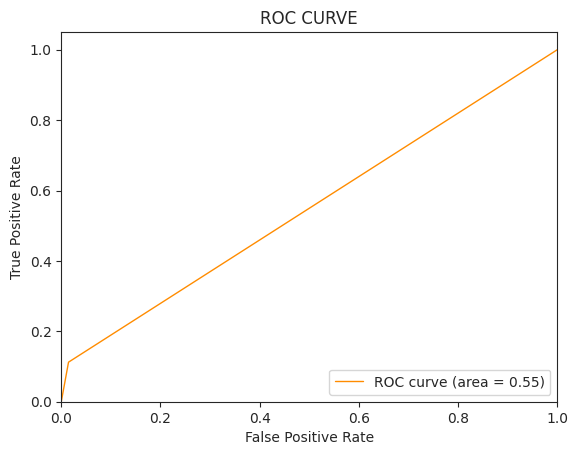

Performance: 

TPR=    91.43602764134894
TNR=    44.42605997931748
Pre=    98.53832345101452
FPR=    55.57394002068252
FNR=    8.563972358651045


Duration: 0:08:49.570599


(0.9029732265580179, 0.002027134878570152)

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()
model_accuracy(classifier=clf_RF, predictors=x_train, target=y_train)

# Decision Tree

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    183830
           1       0.61      0.03      0.06     19114

    accuracy                           0.91    202944
   macro avg       0.76      0.52      0.51    202944
weighted avg       0.88      0.91      0.87    202944



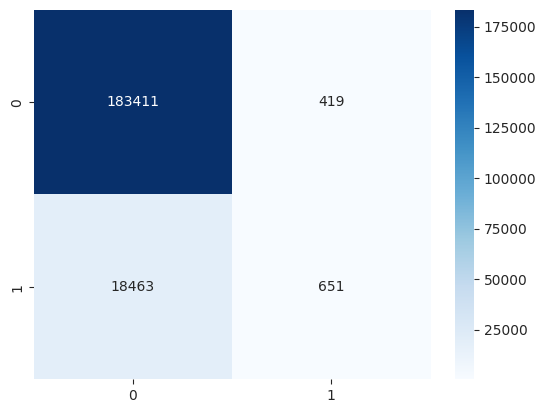

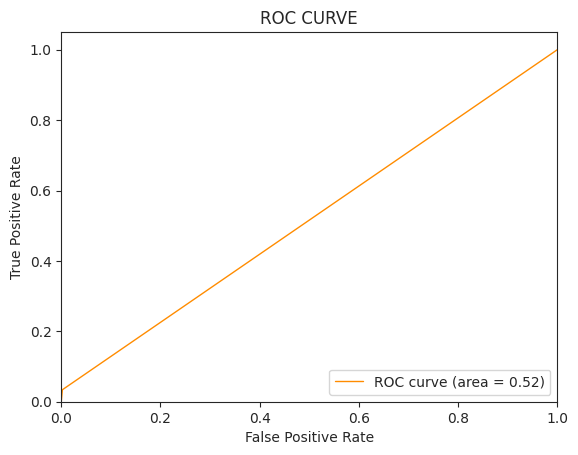

Performance: 

TPR=    90.85419618177674
TNR=    60.8411214953271
Pre=    99.77207202306478
FPR=    39.15887850467289
FNR=    9.145803818223248


Duration: 0:00:08.343896


(0.9069595465989689, 0.0018687153055330875)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(max_depth=4,random_state=30)
model_accuracy(classifier=clf_DT, predictors=x_train, target=y_train)

In [ ]:
clf_ad = AdaBoostClassifier()
clf_ad.fit(x_train, y_train)

In [ ]:
import pickle
str_p = pickle.dumps(clf_ad)
file = open("heart_.plk","wb")
file.write(str_p)
file.close()

In [ ]:
file = open('heart_.plk', 'rb')
clf = pickle.load(file)
data = np.array([1,	1,	1,	12,	1,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	0,	1,	9, 2, 3])
data = data.reshape(1,-1)
nf=clf_ad.predict(data)
print('Predicted Class:' ,nf)

In [ ]:
data = np.array([1,	1,	1,	28,	1,	0,	2,	1,	1,	1,	0,	1,	0,	3,	0,	14,	1,	1,	9, 4, 5])
data = data.reshape(1,-1)
nf=clf_ad.predict(data)
print('Predicted Class:' ,nf)

# ANN Architecture


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,4.0,6.0
2,0.0,1.0,0.0,1.0,37.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,7.0,5.0,6.0
3,0.0,1.0,1.0,1.0,34.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,4.0,7.0
4,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,0.0,0.0,1.0,4.0,6.0,8.0


In [ ]:
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
227277,0,1,0,1,9,1,0,2,0,1,...,1,0,1,0,21,0,1,10,5,4
144570,0,0,0,1,16,1,0,0,1,1,...,1,0,1,0,0,0,0,7,5,6
59810,0,1,1,1,17,1,0,0,1,1,...,1,0,0,0,0,0,1,10,5,7
224350,0,1,1,1,15,0,0,0,1,0,...,1,0,3,0,0,0,1,9,4,3
153606,0,0,0,1,11,1,0,0,0,1,...,1,0,2,0,0,0,0,4,2,4


In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
210660,1.0,0.0,1.0,1.0,0.180723,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.0,0.100000,0.0,0.0,1.000000,0.6,0.285714
199641,0.0,0.0,1.0,1.0,0.144578,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.916667,0.8,0.428571
253291,0.0,0.0,1.0,1.0,0.240964,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.50,0.5,0.833333,1.0,0.0,0.500000,0.8,0.428571
75765,0.0,0.0,1.0,1.0,0.204819,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.00,0.0,0.333333,0.0,0.0,0.166667,0.6,1.000000
181550,0.0,1.0,0.0,1.0,0.192771,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,1.0,0.333333,1.0,1.000000


HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052912
CholCheck               0.044206
NoDocbcCost             0.031000
AnyHealthcare           0.018734
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64

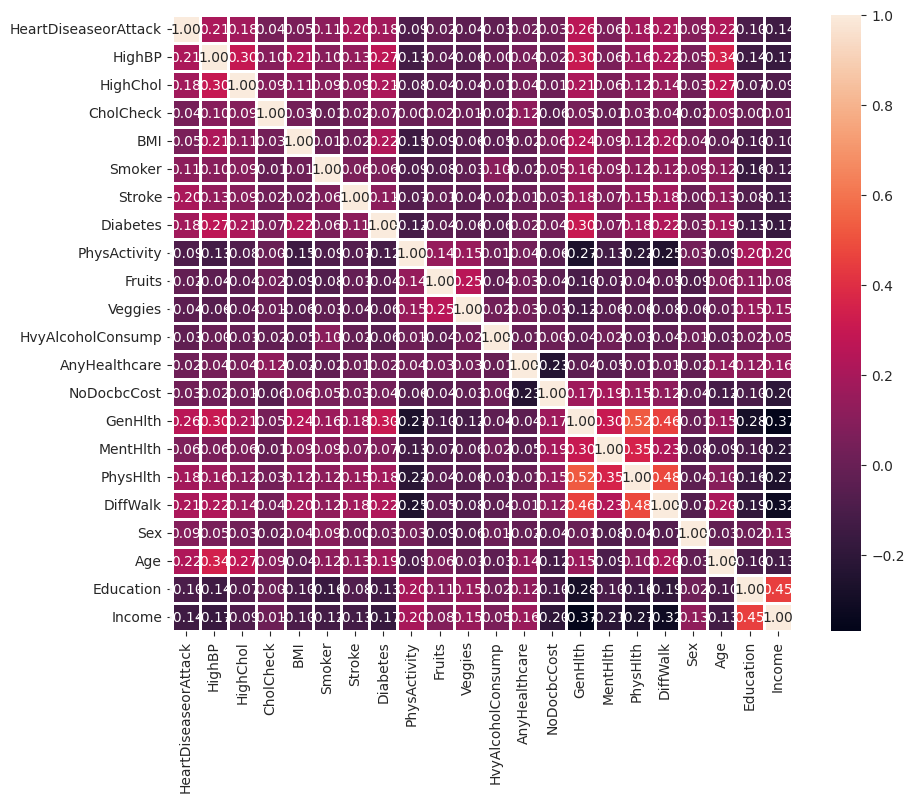

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2, annot_kws={'size': 10})
df.corr()['HeartDiseaseorAttack'].sort_values(ascending=False)

In [ ]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, X_test.shape

((228312, 21), (25368, 21))

In [ ]:
model = Sequential([
    Flatten(input_shape=(21,)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

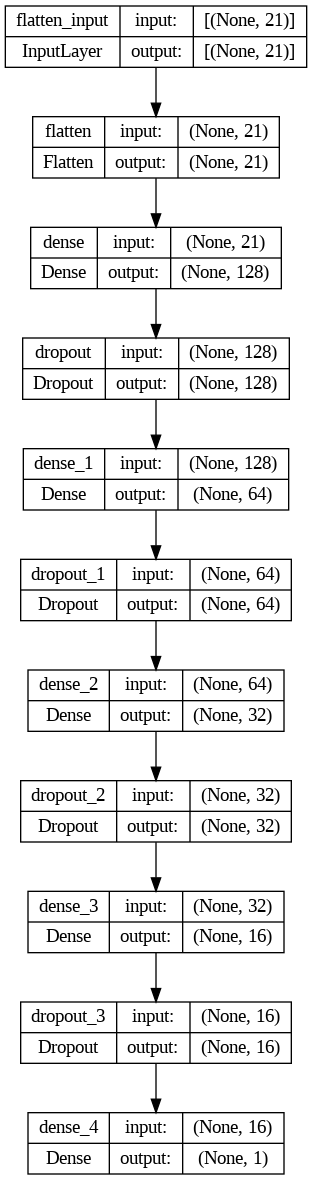

In [ ]:
from tensorflow.keras.utils import plot_model
#from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 21)                0         
                                                                 
 dense (Dense)               (None, 128)               2816      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

793/793 [==============================] - 1s 1ms/step
Model : ANN
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     23035
         1.0       0.60      0.01      0.03      2333

    accuracy                           0.91     25368
   macro avg       0.75      0.51      0.49     25368
weighted avg       0.88      0.91      0.87     25368



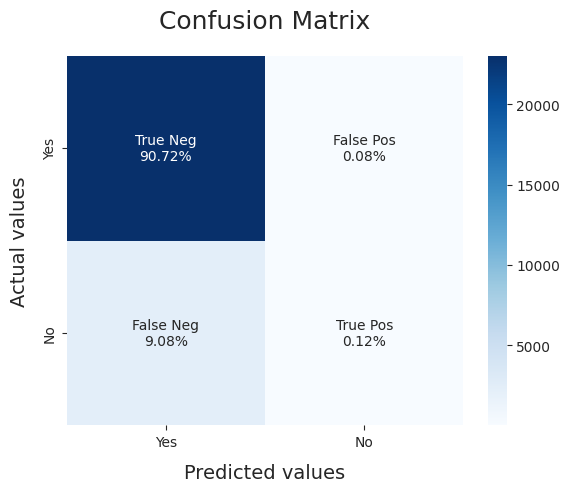

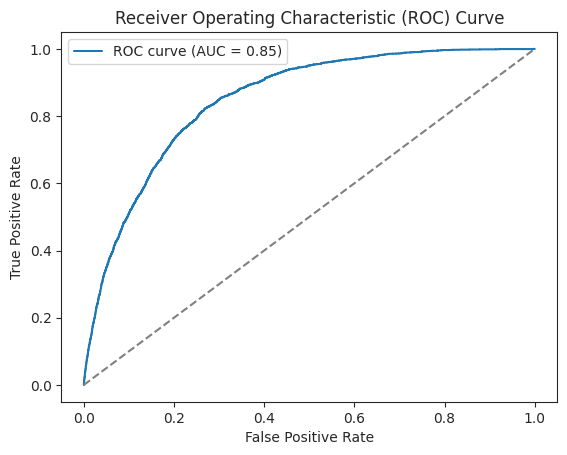

In [ ]:
history_ANN = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=0, shuffle=True)
probabilities = model.predict(X_test).flatten()
predictions = (probabilities > 0.5).astype(int)
loss = history_ANN.history['loss'][-1]
accuracy_ANN = history_ANN.history['accuracy'][-1]

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_roc = roc_auc_score(y_test, probabilities)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)


print("Model : ANN")
print(classification_report(y_test, predictions))
cf_matrix = confusion_matrix(y_test, predictions)
categories  = ['Yes','No']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

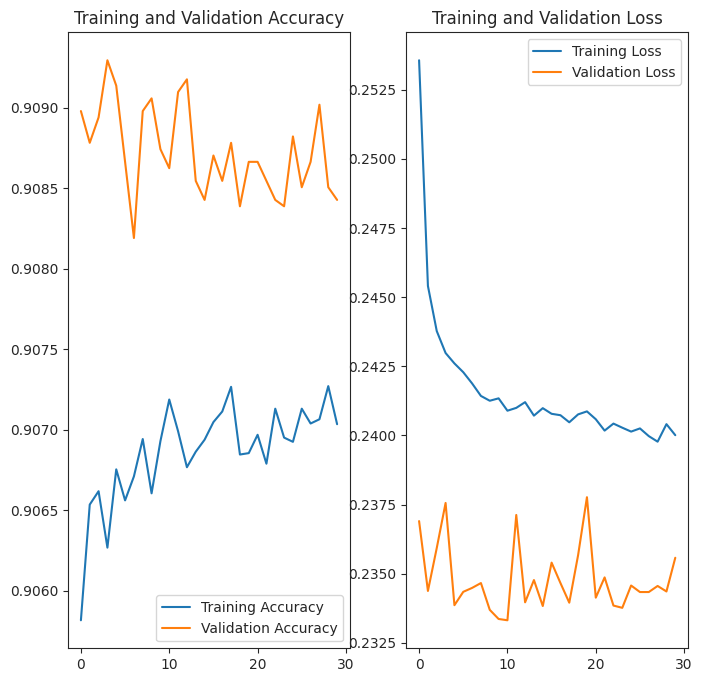

In [ ]:
acc_02 = history_ANN.history['accuracy']
val_acc_02 = history_ANN.history['val_accuracy']

loss_02 = history_ANN.history['loss']
val_loss_02 = history_ANN.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc_02, label='Training Accuracy')
plt.plot(range(30), val_acc_02, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss_02, label='Training Loss')
plt.plot(range(30), val_loss_02, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print("Accuracy of ANN: ",format(accuracy_ANN*100,".2f")+"%")

Accuracy of ANN:  90.70%


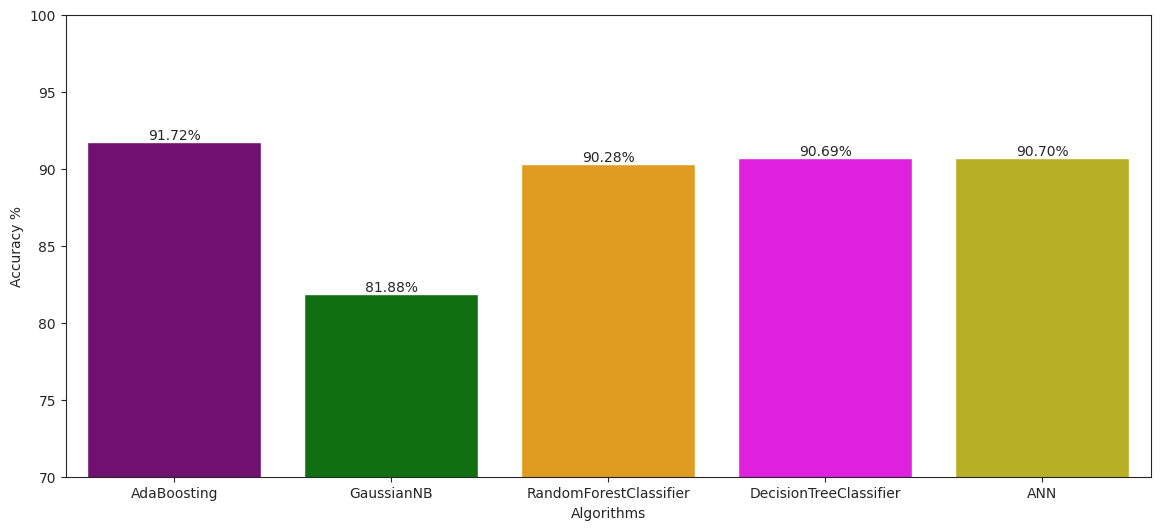

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE", "#87CEEB"]

df = pd.DataFrame(data=
{'Algorithms':['AdaBoosting','GaussianNB', 'RandomForestClassifier', 'DecisionTreeClassifier','ANN'],
'Accuracy %':[91.72, 81.88,90.28 ,90.69, accuracy_ANN*100]})

plt.figure(figsize=(14,6))

p = sns.barplot(x='Algorithms', y='Accuracy %',data=df, palette=colors)
p.set_ylim(70, 100)
for i in p.containers:
    labels = [f'{v.get_height():0.02f}%' for v in i]
    p.bar_label(i, labels=labels)

ValueError: Found input variables with inconsistent numbers of samples: [202944, 228312]

AttributeError: 'AdaBoostClassifier' object has no attribute 'n_classes_'

AttributeError: 'AdaBoostClassifier' object has no attribute 'n_classes_'